In [1]:
! pip install pandas matplotlib numpy seaborn scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Could not save font_manager cache [Errno 13] Permission denied: 'C:\\Users\\91720\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


In [9]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv("abalone/abalone.data", names=columns)
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
X=data[['Length']]
y=data['Rings']+1.5

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [1.76740167]
Intercept: 11.444627357078717


In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tolerance = 1.5
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(f"Custom Accuracy (±1.5 years): {accuracy:.2f}%")

Mean Squared Error: 7.218190305050486
R-squared: 0.3332055198307512
Custom Accuracy (±1.5 years): 49.64%


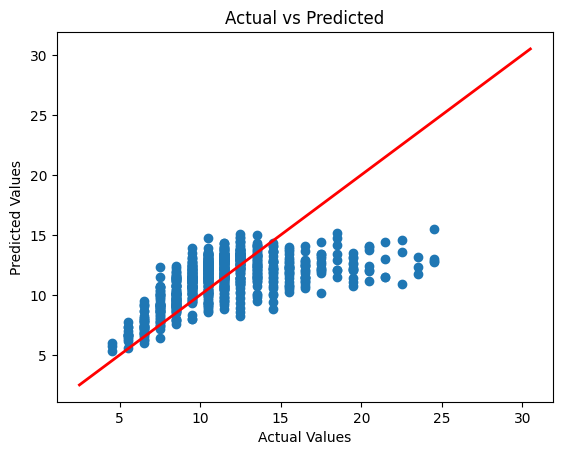

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.show()